In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas_datareader as pdr

/opt/anaconda3/envs/python_for_finance/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


**Basic Statistics**

In [4]:
#initiate a dataframe to store the data
df = pd.DataFrame()

In [5]:
#download JPM's stock price from yahoo
start_date = '2018-02-01'
end_date = '2018-12-30'
source = "yahoo"
JPM = pdr.DataReader('JPM', source, start_date, end_date)
df['JPM'] = JPM.loc['2018-02':,]['Adj Close'] #keep only the adjust close price from 2018-02-01 to 2018-12-30

In [6]:
#calculate and print average stock value during the period
JPM_avg = JPM['Adj Close'].mean()
print(JPM_avg)

103.59153389308763


In [7]:
#calculate and print stock volatility
JPM_vol = JPM['Adj Close'].std()
print(JPM_vol)

4.409561753124603


In [8]:
#calculate and print daily return
JPM['daily_return'] = JPM['Adj Close'].pct_change()
print(JPM['daily_return'])

Date
2018-01-31         NaN
2018-02-01    0.010374
2018-02-02   -0.022162
2018-02-05   -0.047952
2018-02-06    0.030423
                ...   
2018-12-21   -0.023639
2018-12-24   -0.021557
2018-12-26    0.041458
2018-12-27    0.011255
2018-12-28   -0.002164
Name: daily_return, Length: 230, dtype: float64


**Linear Regression**

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
#load S&P500 index
SP500 = pdr.DataReader('^GSPC', source, start_date, end_date)
df['SP500'] = SP500.loc[start_date:,]['Adj Close']

In [11]:
#define comparison plot function
def compare_line(df,column1,column2,label1,label2):
    fig, ax1 = plt.subplots(figsize=(16,5))
    color1 = 'red'
    ax1.plot(df.index, df[column1], label=label1, color=color1)
    ax1.set_ylabel(label1, color=color1)
    ax2 = ax1.twinx()
    color2 = 'blue'
    ax2.plot(df.index, df[column2], label=label2, color=color2)
    ax2.set_ylabel(label2, color=color2)
    plt.show()

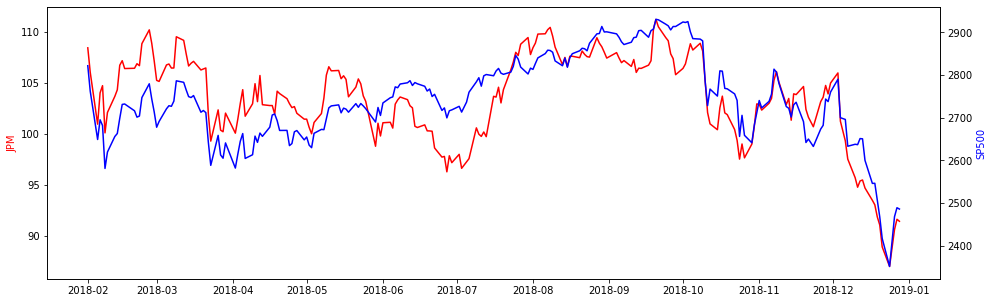

In [12]:
#plot JPM and SP500 price in one chart while using different y-axis
compare_line(df,'JPM','SP500','JPM','SP500')

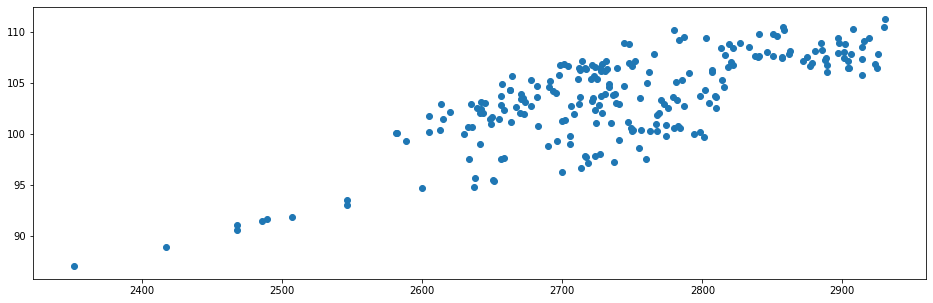

In [13]:
plt.figure(figsize=(16,5))
plt.scatter(df[['SP500']],df[['JPM']])

In [14]:
#initiate linear regression model
#and fit the model with SP500 as dependent variable and JPM as independent variable
reg = LinearRegression()
reg.fit(df[['SP500']],df[['JPM']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#print the coefficient and intercept
print('Coefficient:{}, Intercept:{}'.format(reg.coef_,reg.intercept_))

Coefficient:[[0.03291303]], Intercept:[13.28603993]


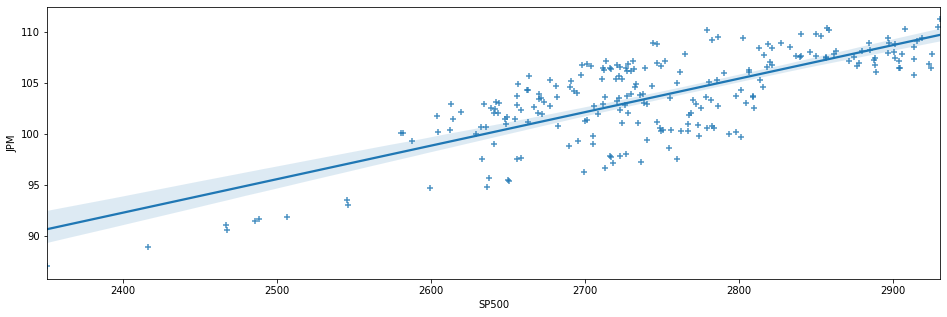

In [16]:
#plot scatter chart for JPM and SP500 price with regression line
plt.figure(figsize=(16,5))
sns.regplot(x='SP500',y='JPM',data=df,marker='+')

In [17]:
reg.score(df[['SP500']],df[['JPM']])

0.578802722852773

**Univariate Time Series**

In [18]:
#load the home price index
df2 = pd.read_csv("CSUSHPISA.csv",header=0,index_col=['DATE'],parse_dates=True)

In [19]:
df2 = df2.resample('M').first()

Use Box-Jenkins method:
1. Identification
2. Estimation
3. Diagnostic Checking


Referece:

"A Gentle Introduction to the Box-Jenkins Method for Time Series Forecasting" - https://machinelearningmastery.com/gentle-introduction-box-jenkins-method-time-series-forecasting/

"How to Create an ARIMA Model for Time Series Forecasting in Python" - 
https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

"How to Grid Search ARIMA Model Hyperparameters with Python" - 
https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/

In [20]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

In [21]:
#identification:
#1. plot the price
#define plot function
def plot_df(df,df_column,df_label):
    fig, ax1 = plt.subplots(figsize=(16,5))
    color1 = 'blue'
    ax1.plot(df.index, df[df_column], label=df_label, color=color1)
    ax1.set_ylabel(df_label, color=color1)
    plt.show()

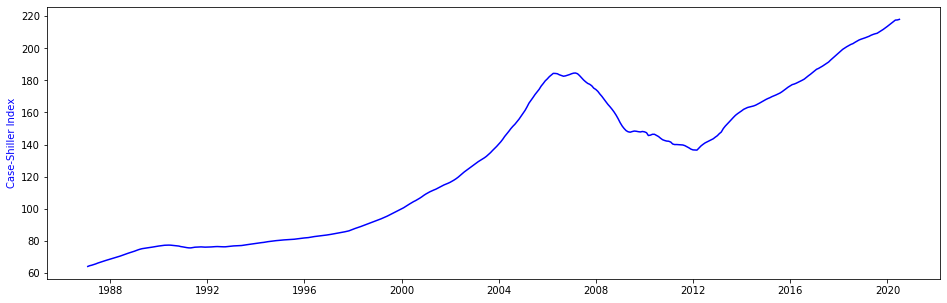

In [22]:
#plot Case-Shiller Index and SP500 price using the function defined - plot_df
plot_df(df2,'CSUSHPISA','Case-Shiller Index')

In [23]:
#2. Augmented Dickey-Fuller Test
def adf_test(df_test):
    CSI_adfuller = adfuller(df_test)
    print("Augemented Dickey-Fuller Test Statistics:\n\
***************************************************************************\n\
t-test:{};\n\
p-value:{};\n\
critical test statistics:{}"
          .format(CSI_adfuller[0],CSI_adfuller[1],CSI_adfuller[4]))

In [24]:
adf_test(df2['CSUSHPISA'])

Augemented Dickey-Fuller Test Statistics:
***************************************************************************
t-test:-0.438817776819273;
p-value:0.9034130797196386;
critical test statistics:{'1%': -3.447360865754795, '5%': -2.8690374364690445, '10%': -2.5707639493486636}


In [25]:
#The p-value is larger than 10%, we cannot reject the null hpythesis that
#Case-Shiller Index has a unit root

In [85]:
#take the first order difference and run ADF test again
df2_diff = df2.diff().dropna()
adf_test(df2_diff)

Augemented Dickey-Fuller Test Statistics:
***************************************************************************
t-test:-2.8681753215515724;
p-value:0.04917591022316217;
critical test statistics:{'1%': -3.447360865754795, '5%': -2.8690374364690445, '10%': -2.5707639493486636}


In [87]:
df2_log = np.log(df2)
adf_test(df2_log)

Augemented Dickey-Fuller Test Statistics:
***************************************************************************
t-test:-0.7115854933524174;
p-value:0.8437257677941298;
critical test statistics:{'1%': -3.447360865754795, '5%': -2.8690374364690445, '10%': -2.5707639493486636}


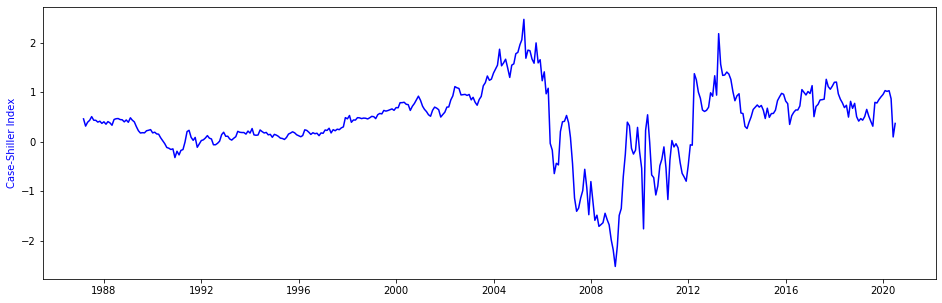

In [86]:
plot_df(df2_diff,'CSUSHPISA','Case-Shiller Index')

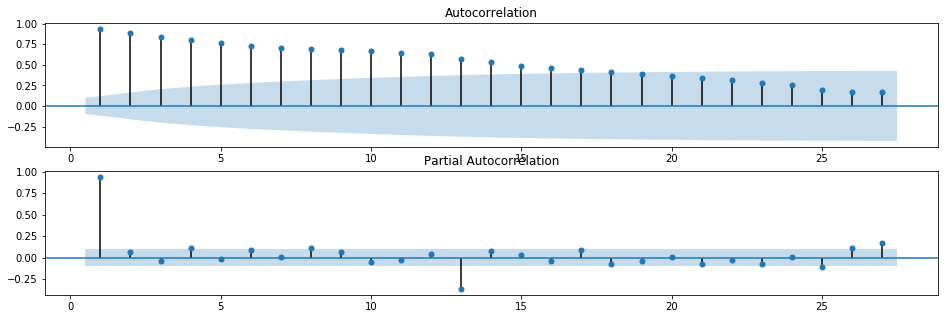

In [28]:
#check acf and pacf plot to see if there's clear pattern of AR and MA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(16,5))
plot_acf(df2_diff, zero=False, ax=ax1)
plot_pacf(df2_diff, zero=False, ax=ax2)
plt.show()

In [80]:
#will run p,q grid search for ARIMA(p,d,q) model on df2
max_p, max_q = 6, 6 #set the maximum search for AR and MA
aic_bic_list = [] #store the AIC BIC

for p in range(max_p):
    for q in range(max_q):
        try:
            model = SARIMAX(df2, order=(p,1,q))
            model_fit = model.fit()
            aic_bic_list.append((p,q,model_fit.aic,model_fit.bic))
        except:
            pass
        
aic_bic_df = pd.DataFrame(aic_bic_list,columns=['p','q','aic','bic'])

/opt/anaconda3/envs/python_for_finance/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/python_for_finance/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/python_for_finance/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/envs/python_for_finance/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/

In [82]:
#select most proper lags for AR and MA based on BIC
aic_bic_df[aic_bic_df['bic']==min(aic_bic_df['bic'])]

,p,q,aic,bic
13,2,1,34.103711,50.079557


In [72]:
guess_model = SARIMAX(df2['CSUSHPISA'], order=(2,1,1))
guess_model_fit = guess_model.fit()

guess_model2 = ARIMA(df2['CSUSHPISA'], order=(2,1,1))
guess_model_fit2 = guess_model2.fit()

In [73]:
guess_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              CSUSHPISA   No. Observations:                  402
Model:               SARIMAX(2, 1, 1)   Log Likelihood                 -13.052
Date:                Wed, 23 Sep 2020   AIC                             34.104
Time:                        20:35:36   BIC                             50.080
Sample:                    01-31-1987   HQIC                            40.430
                         - 06-30-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0336      0.021     -1.579      0.114      -0.075       0.008
ar.L2          0.9401      0.016     59.250      0.000       0.909       0.971
ma.L1          0.9576      0.026     37.018      0.000       0.907       1.008
sigma2         0.0621      0.002     29.968      0.000       0.058       0.066
===================================================================================
Ljung-Box (Q):                      133.75   Jarque-Bera (JB):              2635.54
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              28.73   Skew:                             1.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
guess_model_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.CSUSHPISA   No. Observations:                  401
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 -11.524
Method:                       css-mle   S.D. of innovations              0.248
Date:                Wed, 23 Sep 2020   AIC                             33.047
Time:                        20:35:41   BIC                             53.017
Sample:                    02-28-1987   HQIC                            40.955
                         - 06-30-2020                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3854      0.196      1.969      0.049       0.002       0.769
ar.L1.D.CSUSHPISA    -0.0468      0.021     -2.200      0.028      -0.089      -0.005
ar.L2.D.CSUSHPISA     0.9274      0.020     46.007      0.000       0.888       0.967
ma.L1.D.CSUSHPISA     0.9581      0.024     39.126      0.000       0.910       1.006
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0135           +0.0000j            1.0135            0.5000
AR.2            1.0640           +0.0000j            1.0640            0.0000
MA.1           -1.0437           +0.0000j            1.0437            0.5000
-----------------------------------------------------------------------------
"""

In [100]:
forecast = guess_model_fit.get_prediction(start=-55)
predict = guess_model_fit2.predict(start=df2_diff.index[-50])

In [101]:
def plot_act_pred(act, pred):
    fig, ax = plt.subplots(figsize=(16,5))
    color1 = 'red'
    color2 = 'blue'
    ax.plot(act.index, act, label='Actual', color=color1)
    ax.plot(pred.index, pred, label='Predicted', color=color2)
    plt.legend()
    plt.show()    

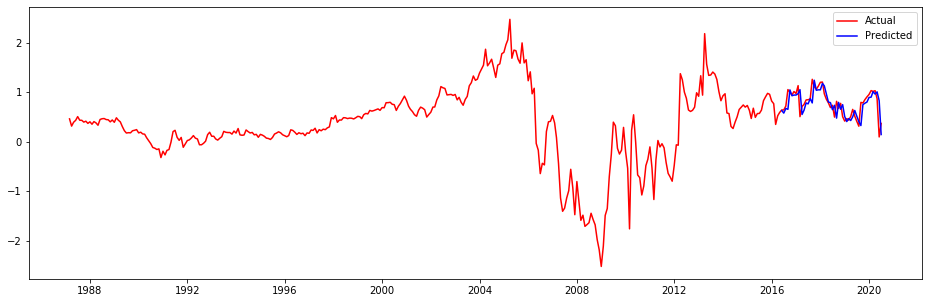

In [102]:
#plot actual Case-Shiller Index diff and prediction diff
plot_act_pred(df2_diff, predict)

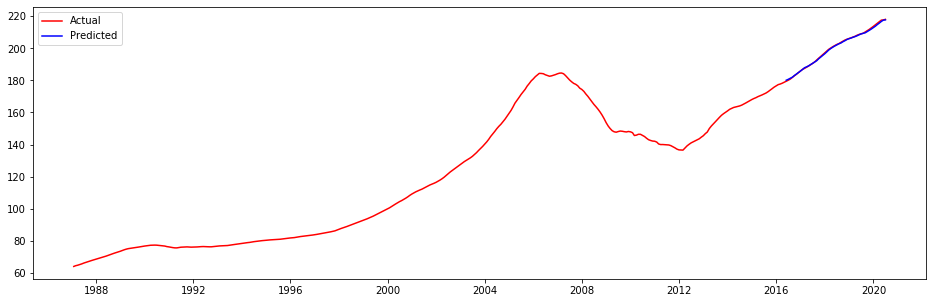

In [103]:
from numpy import cumsum
df_pred = cumsum(predict) + df2.iloc[-50].values
plot_act_pred(df2, df_pred)

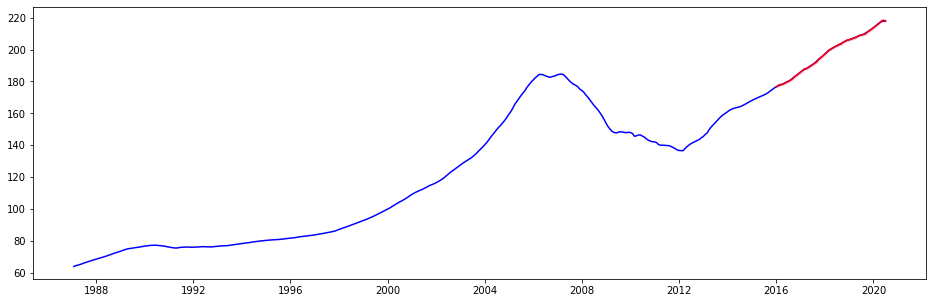

In [104]:
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

plt.figure(figsize=(16,5))
plt.plot(df2.index, df2, color='blue')
plt.plot(mean_forecast.index, mean_forecast.values, color="red", label="forecast")
plt.fill_between(mean_forecast.index, confidence_intervals.iloc[:,0], confidence_intervals.iloc[:,1], color="pink")
plt.show()

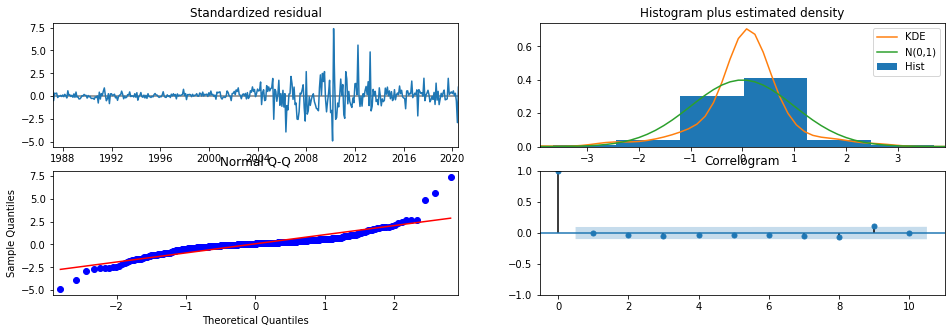

In [105]:
fig_diag = guess_model_fit.plot_diagnostics(figsize=(16,5))